In [52]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [54]:
x_train.shape

(60000, 28, 28)

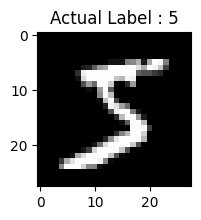

In [55]:
img_id = 0
plt.figure(figsize=(2,2))
plt.imshow(x_train[img_id], cmap='gray')
plt.title(f"Actual Label : {y_train[img_id]}")
plt.show()

In [56]:
# Converting the dataset (60000, 28, 28) into a flattend array of size (60000,784) 

x_train = x_train.reshape((60000, 28*28))/255
x_test = x_test.reshape((10000, 28*28))/255

In [57]:
x_train.shape

(60000, 784)

In [58]:
x_test.shape

(10000, 784)

In [59]:
# One hot encoding Target variables
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

### Build Neural Network

In [60]:
from keras.models import Sequential 
from keras.layers import Dense, BatchNormalization
from keras.layers import LeakyReLU,ReLU, Dropout
from keras.optimizers import RMSprop

In [61]:
model = Sequential()
model.add(Dense(392, input_dim = 784))
model.add(Dense(196, activation=LeakyReLU()))
model.add(Dropout(0.25))
model.add(Dense(98, activation=ReLU()))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax')) # Because multilclass classification problem

In [62]:
model.compile(optimizer=RMSprop(learning_rate=0.0005),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [63]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size=2000,
         epochs=30,
         validation_data=(x_test,y_test_ohe))

Epoch 1/30
30/30 [==============================] - 1s 41ms/step - loss: 0.6285 - accuracy: 0.8181 - val_loss: 0.9556 - val_accuracy: 0.9061
Epoch 2/30
30/30 [==============================] - 1s 32ms/step - loss: 0.2728 - accuracy: 0.9252 - val_loss: 0.6305 - val_accuracy: 0.9419
Epoch 3/30
30/30 [==============================] - 1s 33ms/step - loss: 0.2115 - accuracy: 0.9421 - val_loss: 0.4312 - val_accuracy: 0.9512
Epoch 4/30
30/30 [==============================] - 1s 34ms/step - loss: 0.1754 - accuracy: 0.9517 - val_loss: 0.3007 - val_accuracy: 0.9560
Epoch 5/30
30/30 [==============================] - 1s 34ms/step - loss: 0.1548 - accuracy: 0.9565 - val_loss: 0.2136 - val_accuracy: 0.9603
Epoch 6/30
30/30 [==============================] - 1s 35ms/step - loss: 0.1378 - accuracy: 0.9618 - val_loss: 0.1671 - val_accuracy: 0.9660
Epoch 7/30
30/30 [==============================] - 1s 34ms/step - loss: 0.1234 - accuracy: 0.9658 - val_loss: 0.1346 - val_accuracy: 0.9678
Epoch 8/30
30

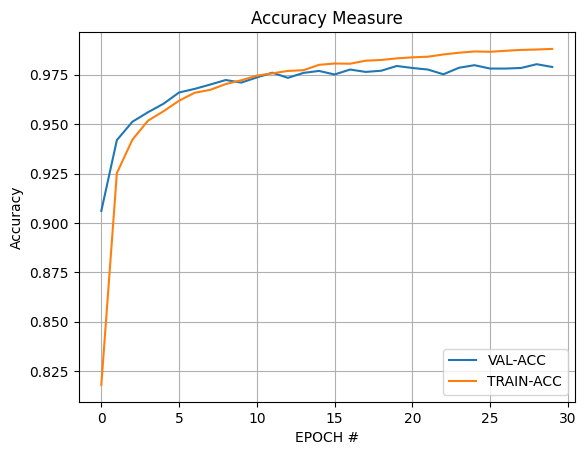

In [64]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.legend(['VAL-ACC', 'TRAIN-ACC'])
plt.title("Accuracy Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Accuracy")
# plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()

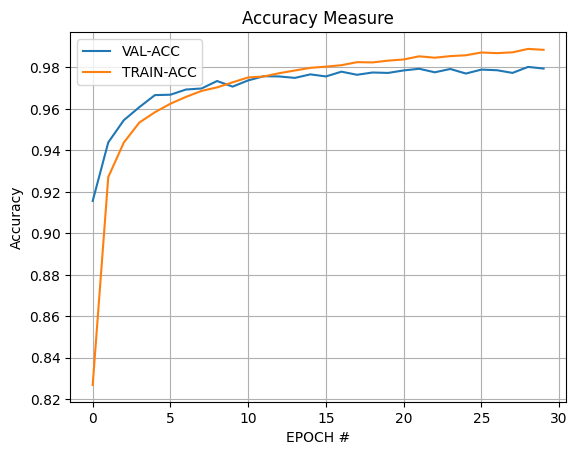

In [50]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.legend(['VAL-ACC', 'TRAIN-ACC'])
plt.title("Accuracy Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Accuracy")
# plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()

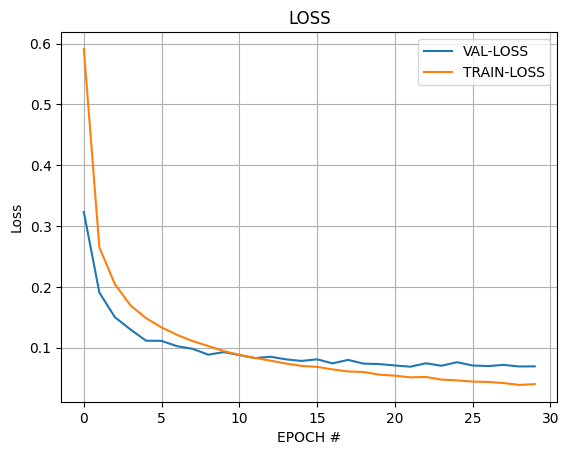

In [51]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.legend(['VAL-LOSS', 'TRAIN-LOSS'])
plt.title("LOSS")
plt.xlabel("EPOCH #")
plt.ylabel("Loss")
plt.grid()
plt.show()

#### Predictions

In [117]:
import numpy as np

In [113]:
x_test[500].reshape(-1,784).shape

(1, 784)

In [122]:
pred = model.predict(x_test[500].reshape(-1,784))

In [123]:
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [125]:
np.argmax(pred)

3

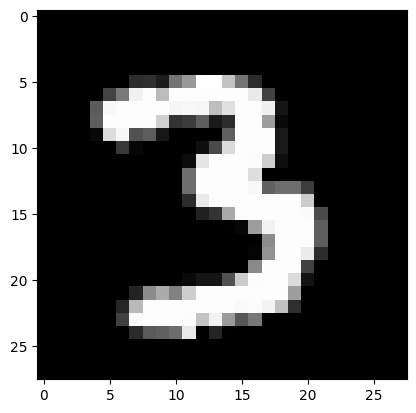

In [126]:
plt.imshow(x_test[500].reshape(28,28), cmap='gray')
plt.show()